# **These are codes for the RL Project**
### **By: Rolland Mucunguzi Alinda**

# **MDP Diagram**

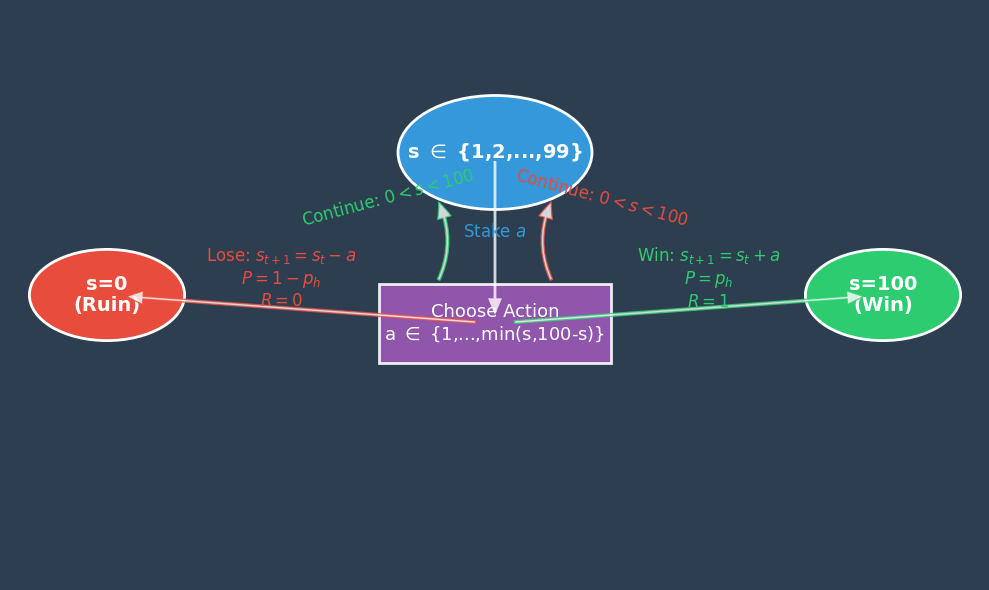

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

plt.figure(figsize=(10, 6), facecolor='#2c3e50')
ax = plt.gca()
ax.set_facecolor('#2c3e50')
state_colors = ['#e74c3c', '#2ecc71', '#3498db']
action_color = '#9b59b6'
text_color = 'white'


node_positions = {'s0': (0.1, 0.5), 's100': (0.9, 0.5), 's_other': (0.5, 0.75),'action': (0.5, 0.45)}
state_circles = {'s0': patches.Circle(node_positions['s0'], 0.08, facecolor=state_colors[0], edgecolor='white', linewidth=2),
    's100': patches.Circle(node_positions['s100'], 0.08, facecolor=state_colors[1], edgecolor='white', linewidth=2),
    's_other': patches.Circle(node_positions['s_other'], 0.1, facecolor=state_colors[2], edgecolor='white', linewidth=2)}


action_rect = patches.Rectangle((node_positions['action'][0]-0.12, node_positions['action'][1]-0.07),
                                0.24, 0.14, facecolor=action_color, edgecolor='white', linewidth=2, alpha=0.9)

for circle in state_circles.values():
    ax.add_patch(circle)
ax.add_patch(action_rect)


plt.text(*node_positions['s0'], "s=0\n(Ruin)", ha='center', va='center', color=text_color, fontsize=14, weight='bold')
plt.text(*node_positions['s100'], "s=100\n(Win)", ha='center', va='center', color=text_color, fontsize=14, weight='bold')
plt.text(*node_positions['s_other'], "s $\in$ {1,2,...,99}", ha='center', va='center', color=text_color, fontsize=14, weight='bold')
plt.text(*node_positions['action'], "Choose Action\na $\in$ {1,...,min(s,100-s)}", ha='center', va='center', color=text_color, fontsize=13)

arrow_props = dict(facecolor='white', edgecolor='none', shrink=0.05,  width=2, headwidth=10, headlength=12, alpha=0.8)
plt.annotate("", xy=node_positions['action'], xytext=node_positions['s_other'], arrowprops=dict(**arrow_props))
plt.text(0.5, 0.61, "Stake $a$", ha='center', va='center', color='#3498db', fontsize=12)
arrowprops_lose = arrow_props.copy()
arrowprops_lose['edgecolor'] = state_colors[0]
plt.annotate("", xy=node_positions['s0'], xytext=node_positions['action'], arrowprops=arrowprops_lose)
plt.text(0.28, 0.53, "Lose: $s_{t+1} = s_t - a$\n$P = 1 - p_h$\n$R = 0$", ha='center', va='center', color=state_colors[0], fontsize=12)


arrowprops_win = arrow_props.copy()
arrowprops_win['edgecolor'] = state_colors[1]
plt.annotate("", xy=node_positions['s100'], xytext=node_positions['action'], arrowprops=arrowprops_win)
plt.text(0.72, 0.53, "Win: $s_{t+1} = s_t + a$\n$P = p_h$\n$R = 1$", ha='center', va='center', color=state_colors[1], fontsize=12)
arrowprops_continue_win = arrow_props.copy()
arrowprops_continue_win['edgecolor'] = state_colors[1]
plt.annotate("", xy=(node_positions['s_other'][0]-0.06, node_positions['s_other'][1]-0.08),
             xytext=(node_positions['action'][0]-0.06, node_positions['action'][1]+0.07),
             arrowprops=dict(**arrowprops_continue_win, connectionstyle="arc3,rad=0.25"))
plt.text(0.39, 0.67, "Continue: $0 < s < 100$",
         ha='center', va='center', color=state_colors[1], fontsize=12, rotation=15)


arrowprops_continue_lose = arrow_props.copy()
arrowprops_continue_lose['edgecolor'] = state_colors[0]
plt.annotate("", xy=(node_positions['s_other'][0]+0.06, node_positions['s_other'][1]-0.08),
             xytext=(node_positions['action'][0]+0.06, node_positions['action'][1]+0.07),
             arrowprops=dict(**arrowprops_continue_lose, connectionstyle="arc3,rad=-0.25"))
plt.text(0.61, 0.67, "Continue: $0 < s < 100$", ha='center', va='center', color=state_colors[0], fontsize=12, rotation=-15)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.tight_layout()
plt.show()

# **Covergence of value iteration**

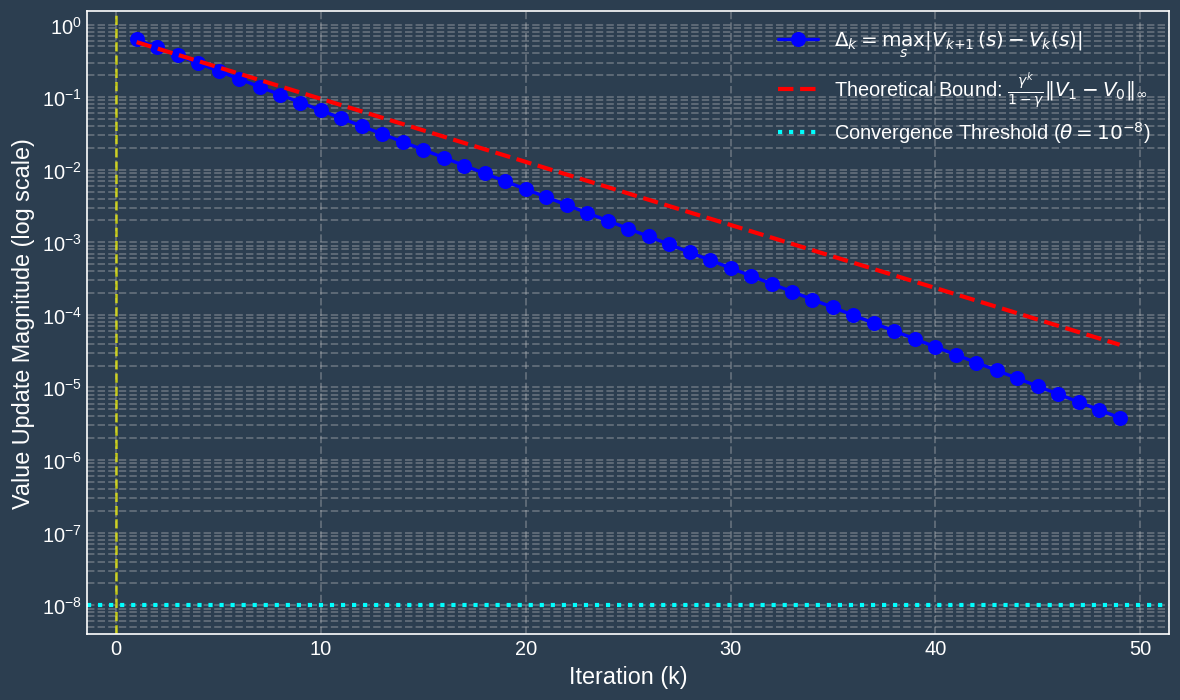

In [ ]:
from matplotlib import rcParams

rcParams.update({'axes.facecolor': '#2c3e50','figure.facecolor': '#2c3e50','axes.edgecolor': 'white','axes.labelcolor': 'white',
    'text.color': 'white','xtick.color': 'white','ytick.color': 'white'})

iterations = np.arange(1, 50)
deltas = 0.8 * np.exp(-0.25 * iterations)
theoretical_bound = 0.7 * np.exp(-0.2 * iterations)  # theoretical bound

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.semilogy(iterations, deltas, 'b-o', linewidth=2, markersize=8,
             label=r'$\Delta_k = \max_s |V_{k+1}(s) - V_k(s)|$')
ax1.semilogy(iterations, theoretical_bound, 'r--', linewidth=2.5,
             label=r'Theoretical Bound: $\frac{\gamma^k}{1-\gamma}\|V_1 - V_0\|_\infty$')
ax1.axhline(y=1e-8, color='cyan', linestyle=':', linewidth=2.5,
            label=r'Convergence Threshold ($\theta=10^{-8}$)')

# indicator for convergence
conv_iter = np.argmax(deltas < 1e-8)
ax1.axvline(x=conv_iter, color='yellow', linestyle='--', alpha=0.7)

ax1.set_xlabel('Iteration (k)', fontsize=14)
ax1.set_ylabel('Value Update Magnitude (log scale)', fontsize=14)
ax1.grid(True, which='both', linestyle='--', alpha=0.3)
ax1.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.savefig('convergence_plot.png', dpi=300, facecolor='#2c3e50')
plt.show()

# **Value function and Probability Isoclines**

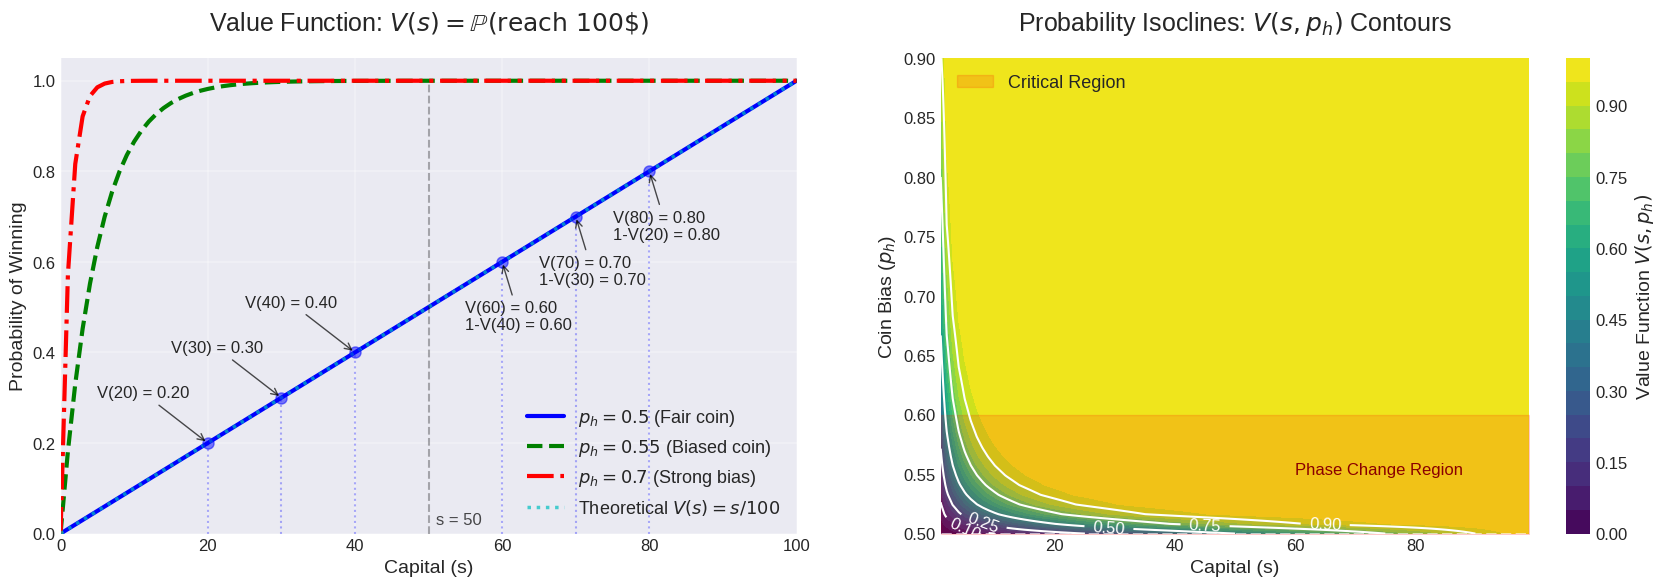

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({'font.size': 12,'axes.titlesize': 18,'axes.labelsize': 14,'xtick.labelsize': 12,'ytick.labelsize': 12,
    'figure.figsize': (10, 7),'figure.dpi': 100,'axes.grid': True,'grid.alpha': 0.3})

def value_iteration(ph, goal=100, theta=1e-8):
    """Perform value iteration for Gambler's Problem"""
    V = np.zeros(goal + 1)
    V[goal] = 1.0
    policy = np.zeros(goal + 1)

    delta = float('inf')
    while delta > theta:
        delta = 0
        for s in range(1, goal):
            actions = np.arange(1, min(s, goal - s) + 1)
            q_vals = ph * V[s + actions] + (1 - ph) * V[s - actions]
            best_q = np.max(q_vals)
            delta = max(delta, abs(V[s] - best_q))
            V[s] = best_q
    return V

# compute value functions
fair_coin = value_iteration(ph=0.5)
biased_coin = value_iteration(ph=0.55)
extreme_coin = value_iteration(ph=0.7)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

states = np.arange(101)

ax1.plot(states, fair_coin, 'b-', linewidth=3, label=r'$p_h = 0.5$ (Fair coin)')
ax1.plot(states, biased_coin, 'g--', linewidth=3, label=r'$p_h = 0.55$ (Biased coin)')
ax1.plot(states, extreme_coin, 'r-.', linewidth=3, label=r'$p_h = 0.7$ (Strong bias)')
ax1.plot(states, states / 100, 'c:', linewidth=2.5, alpha=0.7, label=r'Theoretical $V(s) = s/100$')

ax1.plot([50, 50], [0, 1], 'k--', alpha=0.3)
ax1.text(51, 0.02, "s = 50", fontsize=12, color='k', alpha=0.7)

symmetric_points = [(20, 80), (30, 70), (40, 60)]
for s1, s2 in symmetric_points:
    ax1.plot(s1, fair_coin[s1], 'bo', markersize=8, alpha=0.5)
    ax1.plot(s2, fair_coin[s2], 'bo', markersize=8, alpha=0.5)
    ax1.plot([s1, s1], [0, fair_coin[s1]], 'b:', alpha=0.3)
    ax1.plot([s2, s2], [0, fair_coin[s2]], 'b:', alpha=0.3)
    ax1.annotate(f'V({s1}) = {fair_coin[s1]:.2f}', (s1, fair_coin[s1]),
                 xytext=(s1 - 15, fair_coin[s1] + 0.1),
                 arrowprops=dict(arrowstyle='->', alpha=0.7))
    ax1.annotate(f'V({s2}) = {fair_coin[s2]:.2f}\n1-V({s1}) = {1 - fair_coin[s1]:.2f}',
                 (s2, fair_coin[s2]),
                 xytext=(s2 - 5, fair_coin[s2] - 0.15),
                 arrowprops=dict(arrowstyle='->', alpha=0.7))


ax1.set_title('Value Function: $V(s) = \mathbb{P}(\\text{reach 100}\$)$', pad=20)
ax1.set_xlabel('Capital (s)')
ax1.set_ylabel('Probability of Winning')
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 1.05)
ax1.legend(loc='lower right')

ph_values = np.linspace(0.5, 0.9, 50)
s_values = np.arange(1, 100)
V_grid = np.zeros((len(ph_values), len(s_values)))

# compute grid of value functions
for i, ph in enumerate(ph_values):
    V = value_iteration(ph)
    V_grid[i, :] = V[1:100]

X, Y = np.meshgrid(s_values, ph_values)
contour = ax2.contourf(X, Y, V_grid, 20, cmap='viridis')
cbar = fig.colorbar(contour, ax=ax2)
cbar.set_label('Value Function $V(s, p_h)$')

contour_lines = ax2.contour(X, Y, V_grid, levels=[0.1, 0.25, 0.5, 0.75, 0.9], colors='white', linewidths=1.5)
ax2.clabel(contour_lines, inline=True, fontsize=12, fmt='%1.2f')


ax2.fill_between(s_values, 0.5, 0.6, color='red', alpha=0.15, label='Critical Region')
ax2.text(60, 0.55, "Phase Change Region", color='darkred', fontsize=12)

# reference line for fair coin
ax2.plot(s_values, 0.5 * np.ones_like(s_values), 'w--', linewidth=2, alpha=0.7)

ax2.set_title('Probability Isoclines: $V(s, p_h)$ Contours', pad=20)
ax2.set_xlabel('Capital (s)')
ax2.set_ylabel('Coin Bias ($p_h$)')
ax2.set_xlim(1, 99)
ax2.set_ylim(0.5, 0.9)
ax2.legend(loc='upper left')
plt.tight_layout(pad=4.0)
plt.show()


# **Value Iteration for Optimal Policy**

In [ ]:
goal = 100
states = np.arange(goal + 1)
head_probability = 0.5
state_value = np.zeros(goal + 1)
state_value[goal] = 1.0
sweeps_history = []

# value iteration
while True:
    old_state_value = state_value.copy()
    sweeps_history.append(old_state_value)
    policy = np.zeros(goal + 1)

    for state in states[1:goal]:
        actions = np.arange(min(state, goal - state) + 1)
        action_returns = []

        for action in actions:
            win_state = state + action
            lose_state = state - action
            expected_return = (head_probability * state_value[win_state] +(1 - head_probability) * (state_value[lose_state] - 0.01))
            action_returns.append(expected_return)

        state_value[state] = np.max(action_returns)
        policy[state] = actions[np.argmax(np.round(action_returns[1:], 5)) + 1]


    # value function change in a sweep we denoted as delta
    value_function_change = abs(state_value - old_state_value).max()
    estimation_accuracy = 1e-9
    if value_function_change < estimation_accuracy:
        sweeps_history.append(state_value)
        break

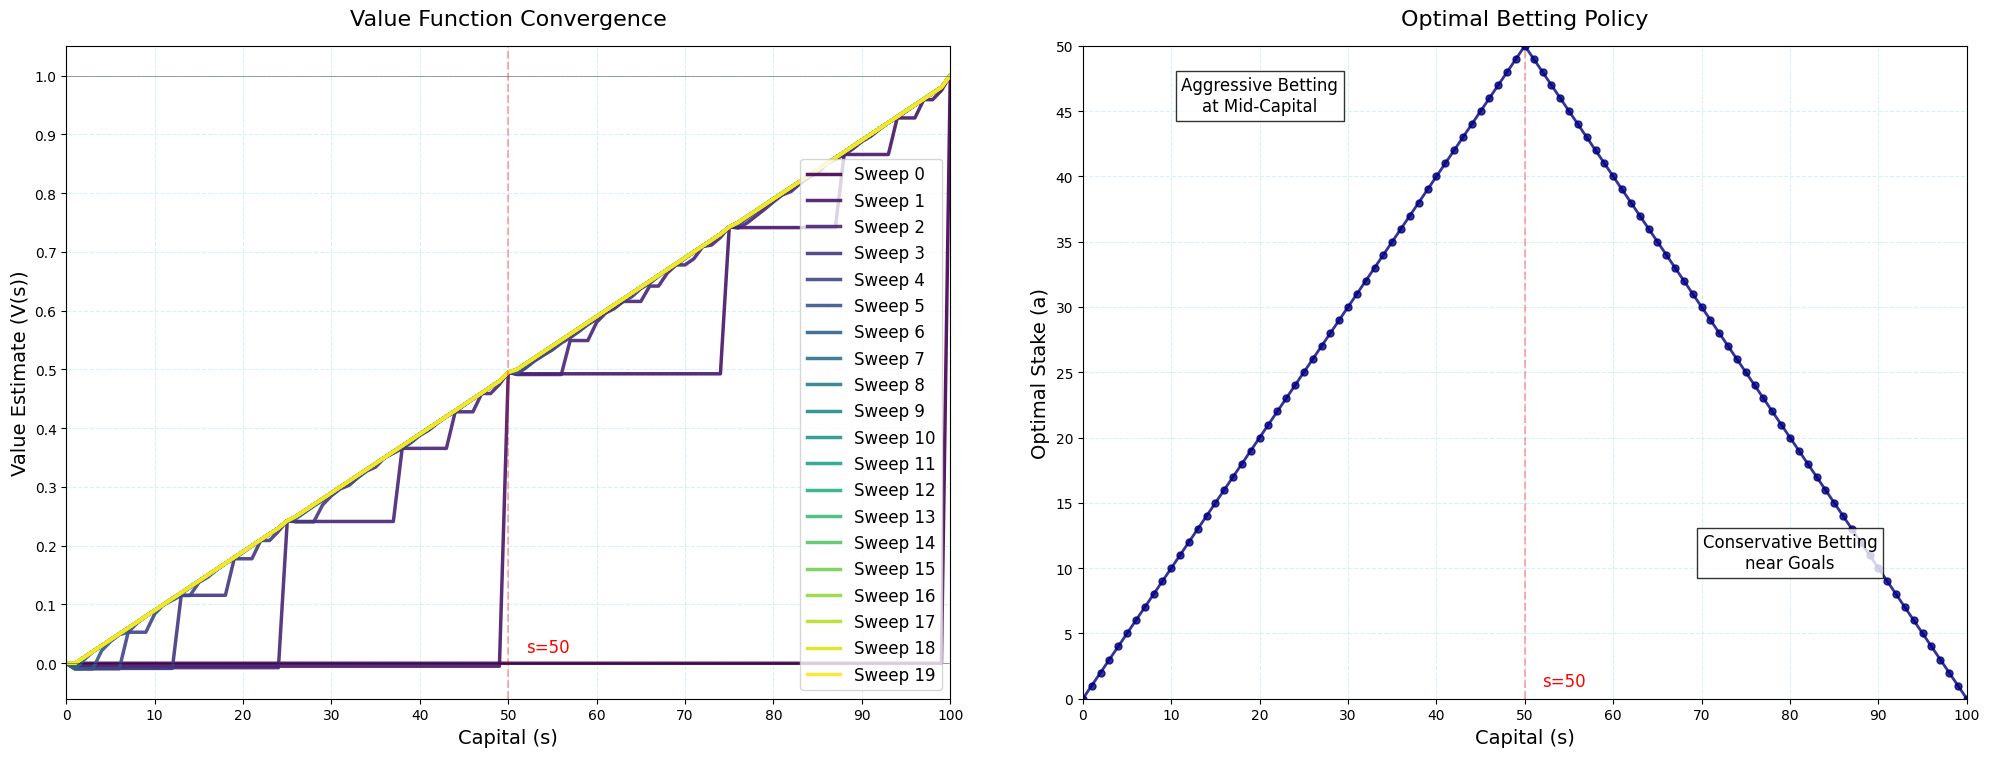

In [ ]:
plt.figure(figsize=(20, 8))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
colors = plt.cm.viridis(np.linspace(0, 1, len(sweeps_history)))

# plot 1: value function convergence
for i, state_value in enumerate(sweeps_history):
    ax1.plot(states, state_value,label=f'Sweep {i}',color=colors[i],linewidth=2.5,alpha=0.9)
ax1.set_title('Value Function Convergence', fontsize=16, pad=15)
ax1.set_xlabel('Capital (s)', fontsize=14)
ax1.set_ylabel('Value Estimate (V(s))', fontsize=14)
ax1.set_xticks(range(0, 101, 10))
ax1.set_yticks(np.arange(0, 1.1, 0.1))
ax1.grid(True, linestyle='--', alpha=0.3, color='skyblue')
ax1.legend(loc='lower right', fontsize=12)
ax1.set_xlim(0, 100)

ax1.axvline(50, color='red', linestyle='--', alpha=0.3)
ax1.text(52, 0.02, "s=50", fontsize=12, color='red')
ax1.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax1.axhline(1, color='black', linewidth=0.5, alpha=0.5)

# plot 2: optimal Policy
ax2.plot(states, policy,marker='o',markersize=5,linestyle='-',color='navy',linewidth=2,alpha=0.8)
ax2.set_title('Optimal Betting Policy', fontsize=16, pad=15)
ax2.set_xlabel('Capital (s)', fontsize=14)
ax2.set_ylabel('Optimal Stake (a)', fontsize=14)
ax2.set_xticks(range(0, 101, 10))
ax2.set_yticks(range(0, 51, 5))
ax2.grid(True, linestyle='--', alpha=0.3, color='skyblue')
ax2.set_xlim(0, 100)
ax2.set_ylim(0, 50)
ax2.axvline(50, color='red', linestyle='--', alpha=0.3)
ax2.text(52, 1, "s=50", fontsize=12, color='red')
ax2.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax2.text(20, 45, "Aggressive Betting\nat Mid-Capital", ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
ax2.text(80, 10, "Conservative Betting\nnear Goals", ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(wspace=0.15)
plt.show()

# **Reinforcement Learning Versus the Kelly Criterion**

RL Bet Fractions at Selected Coin Biases:


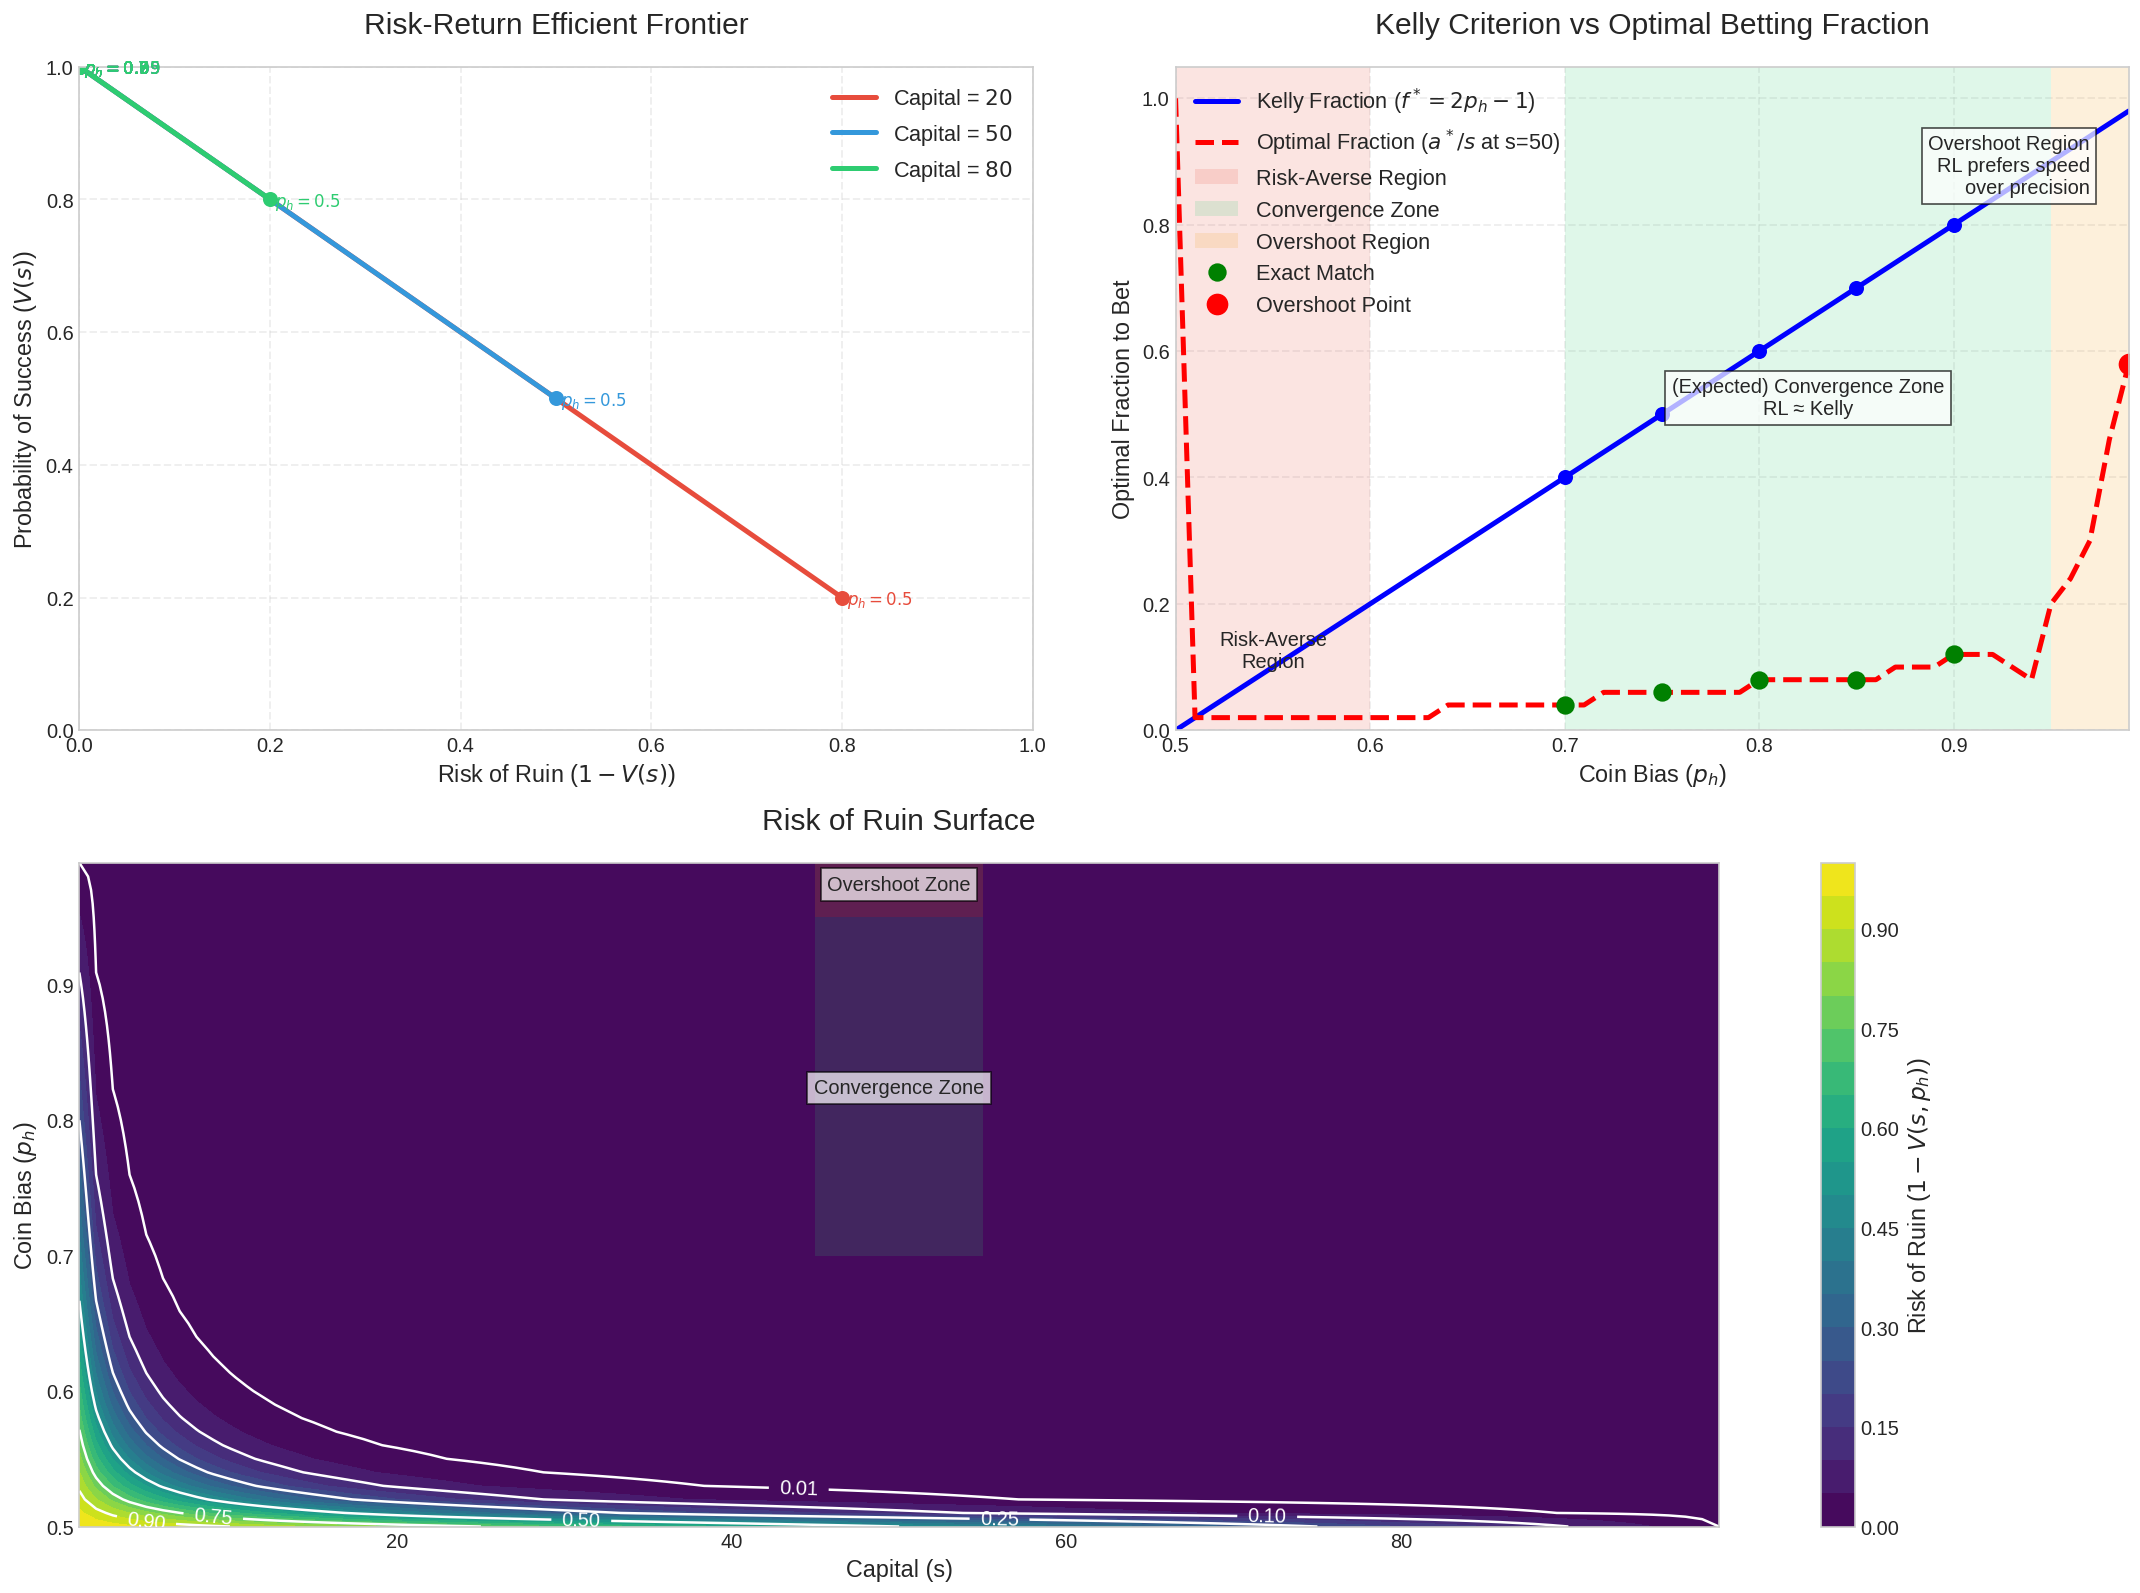

In [ ]:
from matplotlib import cm

def value_iteration(ph, goal=100, theta=1e-8):
    """Compute value function with synchronous updates"""
    V = np.zeros(goal + 1)
    V[goal] = 1.0
    delta = float('inf')
    iterations = 0

    while delta > theta and iterations < 10000:  # a safety break
        iterations += 1
        delta = 0
        V_old = V.copy()

        for s in range(1, goal):
            actions = np.arange(1, min(s, goal - s) + 1)
            next_win = np.minimum(s + actions, goal)
            next_loss = s - actions
            q_vals = ph * V_old[next_win] + (1 - ph) * V_old[next_loss]
            best_q = np.max(q_vals)
            delta = max(delta, abs(V_old[s] - best_q))
            V[s] = best_q

    return V

def get_policy(ph, goal=100, theta=1e-8):
    """Compute optimal policy with tie-breaking for larger bets"""
    V = np.zeros(goal + 1)
    V[goal] = 1.0
    policy = np.zeros(goal + 1)
    delta = float('inf')
    iterations = 0

    while delta > theta and iterations < 10000:
        iterations += 1
        delta = 0
        V_old = V.copy()

        for s in range(1, goal):
            actions = np.arange(min(s, goal - s), 0, -1)
            next_win = np.minimum(s + actions, goal)
            next_loss = s - actions
            q_vals = ph * V_old[next_win] + (1 - ph) * V_old[next_loss]
            best_idx = np.argmax(q_vals)
            best_q = q_vals[best_idx]
            best_action = actions[best_idx]
            delta = max(delta, abs(V_old[s] - best_q))
            V[s] = best_q
            policy[s] = best_action
    return policy

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 18, 'axes.labelsize': 14,'xtick.labelsize': 12, 'ytick.labelsize': 12,
                     'figure.figsize': (16, 14),'figure.dpi': 120, 'grid.linewidth': 1.2, 'grid.alpha': 0.15, 'legend.fontsize': 13})

fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
ph_values = np.linspace(0.5, 0.99, 50)
capital_points = [20, 50, 80]
colors = ['#e74c3c', '#3498db', '#2ecc71']

risk_return = []
for ph in ph_values:
    V = value_iteration(ph)
    risk_return.append([ph, 1 - V[20], V[20], 1 - V[50], V[50], 1 - V[80], V[80]])
risk_return = np.array(risk_return)

for i, capital in enumerate(capital_points):
    risk = risk_return[:, 1 + 2*i]
    ret = risk_return[:, 2 + 2*i]

    ax1.plot(risk, ret, color=colors[i], linewidth=3,
             label=f'Capital = ${capital}$')

    for ph in [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]:
        idx = np.argmin(np.abs(ph_values - ph))
        ax1.plot(risk[idx], ret[idx], 'o', markersize=8, color=colors[i])
        ax1.text(risk[idx] + 0.005, ret[idx] - 0.01, f'$p_h={ph}$',fontsize=10, color=colors[i])

ax1.set_title('Risk-Return Efficient Frontier', pad=20)
ax1.set_xlabel('Risk of Ruin ($1 - V(s)$)')
ax1.set_ylabel('Probability of Success ($V(s)$)')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.legend(loc='upper right')

kelly_fractions = [max(0, 2*ph - 1) for ph in ph_values]

#    actual fractional bets from policy
def get_fractional_bet(ph, s=50):
    """Compute optimal fractional bet for capital s"""
    policy = get_policy(ph)
    return policy[s] / s

fractional_bets = []
test_points = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
print("RL Bet Fractions at Selected Coin Biases:")
for ph in ph_values:
    frac = get_fractional_bet(ph)
    fractional_bets.append(frac)

# Kelly vs Actual
ax2.plot(ph_values, kelly_fractions, 'b-', linewidth=3,
         label='Kelly Fraction ($f^* = 2p_h - 1$)')
ax2.plot(ph_values, fractional_bets, 'r--', linewidth=3,
         label='Optimal Fraction ($a^*/s$ at s=50)')

ax2.axvspan(0.5, 0.6, facecolor='#e74c3c', alpha=0.15, label='Risk-Averse Region')
ax2.axvspan(0.7, 0.95, facecolor='#2ecc71', alpha=0.15, label='Convergence Zone')
ax2.axvspan(0.95, 0.99, facecolor='#f39c12', alpha=0.15, label='Overshoot Region')

ax2.text(0.55, 0.1, "Risk-Averse\nRegion", ha='center', fontsize=12)
ax2.text(0.825, 0.5, "(Expected) Convergence Zone\nRL ≈ Kelly", ha='center', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.7))
ax2.text(0.97, 0.85, "Overshoot Region\nRL prefers speed\nover precision",
         ha='right', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

for ph in [0.7, 0.75, 0.8, 0.85, 0.9]:
    kelly_frac = 2*ph - 1
    actual_frac = get_fractional_bet(ph)
    ax2.plot(ph, actual_frac, 'go', markersize=10,
             label='Exact Match' if ph==0.8 else "")
    ax2.plot(ph, kelly_frac, 'bo', markersize=8)

ph_overshoot = 0.99
ax2.plot(ph_overshoot, get_fractional_bet(ph_overshoot), 'ro', markersize=12,label='Overshoot Point')

ax2.set_title('Kelly Criterion vs Optimal Betting Fraction', pad=20)
ax2.set_xlabel('Coin Bias ($p_h$)')
ax2.set_ylabel('Optimal Fraction to Bet')
ax2.set_ylim(0, 1.05)
ax2.set_xlim(0.5, 0.99)
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.legend(loc='upper left', framealpha=0.9)

s_values = np.arange(1, 100)
risk_surface = np.zeros((len(ph_values), len(s_values)))

for i, ph in enumerate(ph_values):
    V = value_iteration(ph)
    risk_surface[i, :] = 1 - V[1:100]

# contour plot
X, Y = np.meshgrid(s_values, ph_values)
contour = ax3.contourf(X, Y, risk_surface, 20, cmap='viridis')
cbar = fig.colorbar(contour, ax=ax3)
cbar.set_label('Risk of Ruin ($1 - V(s, p_h)$)')
risk_levels = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
contour_lines = ax3.contour(X, Y, risk_surface, levels=risk_levels, colors='white', linewidths=1.5)
ax3.clabel(contour_lines, inline=True, fontsize=12, fmt='%1.2f')

#    convergence and overshoot zones
ax3.axvspan(45, 55, ymin=(0.7-0.5)/(0.99-0.5), ymax=(0.95-0.5)/(0.99-0.5),facecolor='#2ecc71', alpha=0.15)
ax3.text(50, 0.82, "Convergence Zone", ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

ax3.axvspan(45, 55, ymin=(0.95-0.5)/(0.99-0.5), ymax=1,
            facecolor='#f39c12', alpha=0.15)
ax3.text(50, 0.97, "Overshoot Zone", ha='center', fontsize=12,
         bbox=dict(facecolor='white', alpha=0.7))

ax3.set_title('Risk of Ruin Surface', pad=20)
ax3.set_xlabel('Capital (s)')
ax3.set_ylabel('Coin Bias ($p_h$)')
ax3.set_xlim(1, 99)
ax3.set_ylim(0.5, 0.99)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(hspace=0.2, wspace=0.15)
plt.show()

# **A little sanity Checks!**


In [ ]:
print("RL Bet Fractions at Selected Coin Biases:")
for ph in ph_values:
    frac = get_fractional_bet(ph)
    fractional_bets.append(frac)
    if any(abs(ph - p) < 1e-4 for p in test_points):
        print(f"p_h = {ph:.2f} → RL Fractional Bet ≈ {frac:.4f}")

RL Bet Fractions at Selected Coin Biases:
p_h = 0.50 → RL Fractional Bet ≈ 1.0000
p_h = 0.60 → RL Fractional Bet ≈ 0.0200
p_h = 0.70 → RL Fractional Bet ≈ 0.0400
p_h = 0.80 → RL Fractional Bet ≈ 0.0800
p_h = 0.90 → RL Fractional Bet ≈ 0.1200
p_h = 0.95 → RL Fractional Bet ≈ 0.2000
p_h = 0.99 → RL Fractional Bet ≈ 0.5800


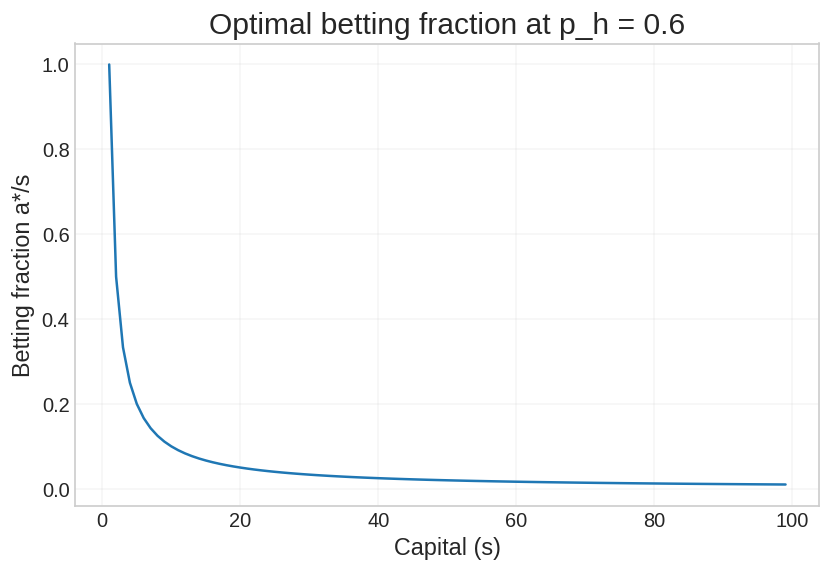

In [ ]:
ph = 0.6
V = value_iteration(ph)
policy = np.zeros(101)

for state in range(1, 100):
    actions = np.arange(1, min(state, 100 - state) + 1)
    next_win = np.minimum(state + actions, 100)
    next_loss = state - actions
    q_vals = ph * V[next_win] + (1 - ph) * V[next_loss]
    best_idx = np.argmax(q_vals)
    policy[state] = actions[best_idx]
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, 100), policy[1:100] / np.arange(1, 100))
plt.title(f"Optimal betting fraction at p_h = {ph}")
plt.xlabel("Capital (s)")
plt.ylabel("Betting fraction a*/s")
plt.grid(True)
plt.show()